# Modelo Predictivo

### Import

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten
from sklearn.preprocessing import StandardScaler

import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

mpl.rcParams['figure.figsize'] = (18, 16)
mpl.rcParams['axes.grid'] = False

### Parameters

In [2]:
EPOCHS=40
PASOS=7

### Load data

#### DataFrame

ARCHIVOS DE DATOS POR ESTACION (DESDE 05-2013). COLUMNAS Y UNIDADES
- Columna 1 : Identificador Estación 
- Columna 2 : Fecha 
- Columna 3 : Temperatura Máxima (ºC)
- Columna 4 : Hora Temperatura Máxima 
- Columna 5 : Temperatura mínima (ºC)
- Columna 6 : Hora Temperatura mínima 
- Columna 7 : Temperatura Media (ºC)
- Columna 8 : Racha máxima de viento (Km/h)
- Columna 9 : Hora de Racha Máxima 
- Columna 10 : Velocidad media de Viento (Km/h)
- Columna 11 : Hora de Velocidad Máxima de viento 
- Columna 12 : Precipitacion Total diaria (mm)
- Columna 13 : Precipitacion de 0 a 6 horas (mm)
- Columna 14 : Precipitacion de 6 a 12 horas (mm)
- Columna 15 : Precipitacion de 12 a 18 horas (mm)
- Columna 16 : Precipitacion de 18 a 24 horas (mm)

In [3]:
station = "0016A"
file = f'../data/DatosEstaciones - 2020-08/{station}.csv'

df = pd.read_csv(file, sep=";", index_col=1)
df

,Id,Tmax,HTmax,Tmin,HTmin,Tmed,Racha,HRacha,Vmax,HVmax,TPrec,Prec1,Prec2,Prec3,Prec4
Fecha,,,,,,,,,,,,,,,
2013-05-07,0016A,27.5,14:50,13.5,03:40,20.5,42.0,14:00,31.0,14:00,0.0,0.0,0.0,0.0,0.0
2013-05-08,0016A,25.5,14:50,15.0,05:50,20.3,33.0,16:00,22.0,15:50,0.0,0.0,0.0,0.0,0.0
2013-05-09,0016A,22.3,14:00,14.8,05:30,18.5,24.0,22:40,17.0,22:40,0.2,0.0,0.0,0.0,0.2
2013-05-10,0016A,25.3,17:30,13.8,06:20,19.5,42.0,04:20,35.0,14:40,0.0,0.0,0.0,0.0,0.0
2013-05-11,0016A,24.1,15:00,13.3,07:10,18.7,45.0,14:10,29.0,14:10,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-27,0016A,31.9,14:00,22.3,06:50,27.1,24.0,15:20,15.0,15:50,0.0,0.0,0.0,0.0,0.0
2020-08-28,0016A,31.8,15:20,21.9,23:50,26.8,28.0,11:40,19.0,15:50,26.3,0.0,0.0,0.0,26.3
2020-08-29,0016A,26.3,14:20,17.0,23:59,21.6,35.0,11:00,26.0,10:30,18.8,18.0,0.0,0.8,0.0


In [4]:

df = df.drop(["Id"], axis=1)

df.index = pd.to_datetime(df.index)
df['weekday']=[x.weekday() for x in df.index]
df['month']=[x.month for x in df.index]
df['day']=[x.day for x in df.index]
# df = df.drop(["Fecha"], axis=1)

df["HTmax"] = pd.to_datetime(df.HTmax)
df['HTmax_hour']=[x.hour for x in df.HTmax]
df['HTmax_min']=[x.minute for x in df.HTmax]
df = df.drop(["HTmax"], axis=1)

df["HTmin"] = pd.to_datetime(df.HTmin)
df['HTmin_hour']=[x.hour for x in df.HTmin]
df['HTmin_min']=[x.minute for x in df.HTmin]
df = df.drop(["HTmin"], axis=1)

df["HRacha"] = pd.to_datetime(df.HRacha)
df['HRacha_hour']=[x.hour for x in df.HRacha]
df['HRacha_min']=[x.minute for x in df.HRacha]
df = df.drop(["HRacha"], axis=1)

df["HVmax"] = pd.to_datetime(df.HVmax)
df['HVmax_hour']=[x.hour for x in df.HVmax]
df['HVmax_min']=[x.minute for x in df.HVmax]
df = df.drop(["HVmax"], axis=1)

timestamp_s = df.index.map(datetime.datetime.timestamp)
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

df.T


Fecha,2013-05-07,2013-05-08,2013-05-09,2013-05-10,2013-05-11,2013-05-12,2013-05-13,2013-05-14,2013-05-15,2013-05-16,...,2020-08-22,2020-08-23,2020-08-24,2020-08-25,2020-08-26,2020-08-27,2020-08-28,2020-08-29,2020-08-30,2020-08-31
Tmax,27.500000,25.500000,22.300000,25.300000,24.100000,24.400000,21.500000,18.900000,19.100000,20.300000,...,32.600000,32.700000,32.400000,33.000000,32.200000,31.900000,31.800000,26.300000,28.400000,28.400000
Tmin,13.500000,15.000000,14.800000,13.800000,13.300000,12.200000,10.600000,15.100000,11.600000,9.800000,...,22.400000,22.300000,18.900000,21.700000,23.200000,22.300000,21.900000,17.000000,15.100000,15.100000
Tmed,20.500000,20.300000,18.500000,19.500000,18.700000,18.300000,16.100000,17.000000,15.400000,15.000000,...,27.500000,27.500000,25.700000,27.400000,27.700000,27.100000,26.800000,21.600000,21.800000,21.800000
Racha,42.000000,33.000000,24.000000,42.000000,45.000000,48.000000,30.000000,22.000000,35.000000,45.000000,...,32.000000,39.000000,46.000000,33.000000,30.000000,24.000000,28.000000,35.000000,46.000000,42.000000
Vmax,31.000000,22.000000,17.000000,35.000000,29.000000,32.000000,19.000000,13.000000,22.000000,31.000000,...,20.000000,28.000000,33.000000,24.000000,15.000000,15.000000,19.000000,26.000000,33.000000,31.000000
TPrec,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,NaN,18.900000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.300000,18.800000,0.000000,6.500000
Prec1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,6.500000
Prec2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Prec3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000,12.200000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000,0.000000,0.000000
Prec4,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,6.600000,6.700000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.300000,0.000000,0.000000,0.000000


#### Missing Values

In [5]:
missing_values = pd.DataFrame(df.isnull().sum()).rename(columns={0: 'total'})
missing_values.T

,Tmax,Tmin,Tmed,Racha,Vmax,TPrec,Prec1,Prec2,Prec3,Prec4,...,HTmin_hour,HTmin_min,HRacha_hour,HRacha_min,HVmax_hour,HVmax_min,Day sin,Day cos,Year sin,Year cos
total,176,176,176,244,250,246,121,110,88,78,...,176,176,244,244,250,250,0,0,0,0


In [6]:
if not missing_values["total"].values.sum() == 0:
    print("Cuidado que existen valores nulos")
else:
    print("No existen valores nulos")

Cuidado que existen valores nulos


#### Drop NaN

In [7]:
data_pre = df.fillna(method="bfill")

In [8]:
data_pre.isnull().sum()

Tmax           0
Tmin           0
Tmed           0
Racha          0
Vmax           0
TPrec          0
Prec1          0
Prec2          0
Prec3          0
Prec4          0
weekday        0
month          0
day            0
HTmax_hour     0
HTmax_min      0
HTmin_hour     0
HTmin_min      0
HRacha_hour    0
HRacha_min     0
HVmax_hour     0
HVmax_min      0
Day sin        0
Day cos        0
Year sin       0
Year cos       0
dtype: int64

#### Data Types

In [9]:
data_pre.dtypes

Tmax           float64
Tmin           float64
Tmed           float64
Racha          float64
Vmax           float64
TPrec          float64
Prec1          float64
Prec2          float64
Prec3          float64
Prec4          float64
weekday          int64
month            int64
day              int64
HTmax_hour     float64
HTmax_min      float64
HTmin_hour     float64
HTmin_min      float64
HRacha_hour    float64
HRacha_min     float64
HVmax_hour     float64
HVmax_min      float64
Day sin        float64
Day cos        float64
Year sin       float64
Year cos       float64
dtype: object

#### Decribe Data

In [10]:
data_pre.describe()

,Tmax,Tmin,Tmed,Racha,Vmax,TPrec,Prec1,Prec2,Prec3,Prec4,...,HTmin_hour,HTmin_min,HRacha_hour,HRacha_min,HVmax_hour,HVmax_min,Day sin,Day cos,Year sin,Year cos
count,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.00000,2665.000000,2665.000000,2665.000000,...,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000
mean,23.087017,11.976323,17.533734,37.598874,24.557598,1.057749,0.23272,0.207917,0.282289,0.366229,...,7.972983,26.612758,12.572608,24.880675,12.810882,25.757598,-0.404161,0.905723,-0.002350,-0.037353
std,6.320581,6.748539,6.354031,15.672586,10.533683,4.841326,1.74207,1.450101,2.134834,3.052083,...,6.279646,18.036295,5.361770,17.280260,5.614849,17.175798,0.118045,0.048896,0.699809,0.713611
min,3.300000,-5.300000,2.000000,8.000000,4.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.500000,0.866025,-0.999999,-0.999998
25%,17.700000,6.600000,12.100000,28.000000,17.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,5.000000,10.000000,11.000000,10.000000,11.000000,10.000000,-0.500000,0.866025,-0.695535,-0.754051
50%,23.000000,12.100000,17.400000,33.000000,21.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,6.000000,30.000000,14.000000,20.000000,14.000000,30.000000,-0.500000,0.866025,-0.002932,-0.072335
75%,28.600000,17.700000,23.100000,45.000000,30.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,7.000000,40.000000,15.000000,40.000000,16.000000,40.000000,-0.258819,0.965926,0.688337,0.680501
max,39.800000,26.200000,32.100000,124.000000,88.000000,99.500000,48.00000,33.300000,43.100000,96.500000,...,23.000000,59.000000,23.000000,59.000000,23.000000,59.000000,-0.258819,0.965926,1.000000,1.000000


#### Plot Data

In [11]:
plot_cols = [
       'Tmax', 'Tmin', 'Tmed', 'Racha', 
       'Vmax', 'TPrec', 'Prec1',
       'Prec2', 'Prec3', 'Prec4', 'HTmax_hour',
       'HTmax_min', 'HTmin_hour', 'HTmin_min', 
       'HRacha_hour', 'HRacha_min',
       'HVmax_hour', 'HVmax_min']

In [12]:
# plot_features = data_pre[plot_cols]
# plot_features.index = data_pre.index
# _ = plot_features.plot(subplots=True)

# plot_features = data_pre[plot_cols][:480]
# plot_features.index = data_pre.index[:480]
# _ = plot_features.plot(subplots=True)

#### Train / Validación / Prueba

In [13]:
scale = StandardScaler()
df_std = pd.DataFrame(scale.fit_transform(data_pre), 
                      columns = data_pre.columns,
                     index = data_pre.index)

In [14]:
column_indices = {name: i for i, name in enumerate(df_std.columns)}

n = len(df_std)
train_df = df_std[0:int(n*0.7)]
val_df = df_std[int(n*0.7):int(n*0.9)]
test_df = df_std[int(n*0.9):]

num_features = df_std.shape[1]

#### Normalizacion

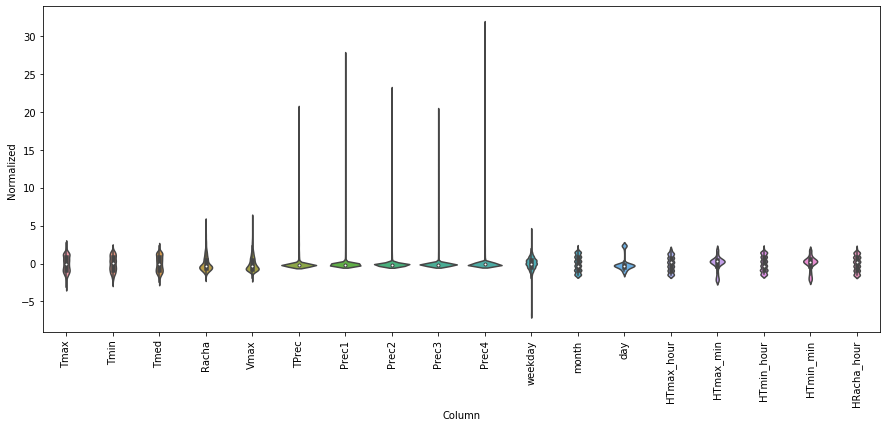

In [15]:
df_std1 = df_std[plot_cols].melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(15, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std1)
_ = ax.set_xticklabels(df.keys(), rotation=90)

## Embeding

In [16]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(100, 2, input_length=5))

input_array = np.random.randint(100, size=(20, 5))
print(input_array.shape)
model.compile('rmsprop', 'mse')
output_array = model.predict(input_array)
print(output_array.shape)

(20, 5)
(20, 5, 2)


In [17]:
input_array[0]

array([83, 36, 84, 43, 80])

In [18]:
output_array[0]

array([[-0.04289318, -0.0465392 ],
       [-0.04552027,  0.04896918],
       [ 0.02166181,  0.03772296],
       [ 0.02030896, -0.00021731],
       [-0.03976841, -0.01309409]], dtype=float32)

## Transformer 

In [19]:
class WindowGenerator():
    """https://www.tensorflow.org/tutorials/structured_data/time_series"""
    def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None, sequence_stride=1,
               shuffle=True, batch_size=32):
        # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df
        
        self.sequence_stride = sequence_stride
        self.shuffle = shuffle
        self.batch_size = batch_size

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                        enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                               enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def split_window(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:, :, self.column_indices[name]] for name in self.label_columns],
                axis=-1)

        # Slicing doesn't preserve static shape information, so set the shapes
        # manually. This way the `tf.data.Datasets` are easier to inspect.
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels    

    def plot(self, model=None, plot_col='Tmed', max_subplots=3):
        
        inputs, labels = self.example
        plt.figure(figsize=(12, 8))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))
        for n in range(max_n):
            plt.subplot(3, 1, n+1)
            plt.ylabel(f'{plot_col} [normed]')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                     label='Inputs', marker='.', zorder=-10)

            if self.label_columns:
                label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
                label_col_index = plot_col_index

            if label_col_index is None:
                continue

            plt.scatter(self.label_indices, labels[n, :, label_col_index], 
                        edgecolors='k', label='Labels', c='#2ca02c', s=64)

            if model is not None:
                predictions = model(inputs)
                plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                          marker='X', edgecolors='k', label='Predictions',
                          c='#ff7f0e', s=64)

            if n == 0:
                plt.legend()

        plt.xlabel('Time [h]')

    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.preprocessing.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=self.sequence_stride,
            shuffle=self.shuffle,
            batch_size=self.batch_size,)

        ds = ds.map(self.split_window)

        return ds

    @property
    def train(self):
        return self.make_dataset(self.train_df)

    @property
    def val(self):
        return self.make_dataset(self.val_df)

    @property
    def test(self):
        return self.make_dataset(self.test_df)

    @property
    def example(self):
        """Get and cache an example batch of `inputs, labels` for plotting."""
        result = getattr(self, '_example', None)
        if result is None:
            # No example batch was found, so get one from the `.train` dataset
            result = next(iter(self.train))
            # And cache it for next time
            self._example = result
        return result

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])

In [20]:
class WindowGenerator1():
    """https://www.tensorflow.org/tutorials/structured_data/time_series"""
    def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None, sequence_stride=1,
               shuffle=True, batch_size=32):
        # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df
        
        self.sequence_stride = sequence_stride
        self.shuffle = shuffle
        self.batch_size = batch_size

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                        enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                               enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def split_window(self, features):
        inputs = features[:, self.input_slice]
        labels = features[:, self.labels_slice]

        # Slicing doesn't preserve static shape information, so set the shapes
        # manually. This way the `tf.data.Datasets` are easier to inspect.
        inputs.set_shape([None, self.input_width])
        labels.set_shape([None, self.label_width])

        return inputs, labels    

    def plot(self, model=None, plot_col='Tmed', max_subplots=3):
        
        inputs, labels = self.example
        plt.figure(figsize=(12, 8))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))
        for n in range(max_n):
            plt.subplot(3, 1, n+1)
            plt.ylabel(f'{plot_col} [normed]')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                     label='Inputs', marker='.', zorder=-10)

            if self.label_columns:
                label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
                label_col_index = plot_col_index

            if label_col_index is None:
                continue

            plt.scatter(self.label_indices, labels[n, :, label_col_index], 
                        edgecolors='k', label='Labels', c='#2ca02c', s=64)

            if model is not None:
                predictions = model(inputs)
                plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                          marker='X', edgecolors='k', label='Predictions',
                          c='#ff7f0e', s=64)

            if n == 0:
                plt.legend()

        plt.xlabel('Time [h]')

    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.preprocessing.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=self.sequence_stride,
            shuffle=self.shuffle,
            batch_size=self.batch_size,)

        ds = ds.map(self.split_window)

        return ds

    @property
    def train(self):
        return self.make_dataset(self.train_df)

    @property
    def val(self):
        return self.make_dataset(self.val_df)

    @property
    def test(self):
        return self.make_dataset(self.test_df)

    @property
    def example(self):
        """Get and cache an example batch of `inputs, labels` for plotting."""
        result = getattr(self, '_example', None)
        if result is None:
            # No example batch was found, so get one from the `.train` dataset
            result = next(iter(self.train))
            # And cache it for next time
            self._example = result
        return result

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])

In [21]:
dd = data_pre["Tmed"].astype("int")

In [22]:
dd.unique()

array([20, 18, 19, 16, 17, 15, 13, 14, 21, 22, 23, 25, 24, 26, 27, 12, 10,
        9,  7,  6,  4,  5, 11,  8,  2, 28, 30, 29, 31,  3, 32],
      dtype=int64)

In [23]:
w11 = WindowGenerator1(input_width=15, label_width=15, 
                      shift=15, 
#                        label_columns=['Tmed']
                      )

In [24]:
ex = dd
example_window = tf.stack([np.array(ex[:w11.total_window_size]),
                           np.array(ex[100:100+w11.total_window_size]),
                           np.array(ex[200:200+w11.total_window_size])])

example_inputs, example_labels = w11.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 30)
Inputs shape: (3, 15)
labels shape: (3, 15)


In [25]:
dataset_make = w11.make_dataset(dd)
dataset_make

<MapDataset shapes: ((None, 15), (None, 15)), types: (tf.float32, tf.float32)>

In [26]:
import sys
sys.path.insert(0, "C:/Users/AUTIS/Google Drive/10_MachineLearning_JS/MachineLearning/05_MLearner/MLearner" )
import mlearner
print(f'Versión de mlearner: {mlearner.__version__}')

Versión de mlearner: 0.2.7


In [27]:
from mlearner.nlp import Transformer
from mlearner.nlp import Processor_data

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [43]:
tf.keras.backend.clear_session()
# Hiper Parámetros
D_MODEL = 5
NB_LAYERS = 4
FFN_UNITS = 512
NB_PROJ = 5
DROPOUT_RATE = 0.1
model_Transformer = Transformer(vocab_size_enc=50,
                                vocab_size_dec=50,
                                d_model=D_MODEL,
                                nb_layers=NB_LAYERS,
                                FFN_units=FFN_UNITS,
                                nb_proj=NB_PROJ,
                                dropout_rate=DROPOUT_RATE)

In [54]:
BATCH_SIZE = 3
BUFFER_SIZE = 20000

dataset = tf.data.Dataset.from_tensor_slices((example_inputs, 
                                              example_labels))

dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

In [55]:
dataset = dataset_make.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

In [87]:
from mlearner.nlp import Transformer_train

EPOCHS = 5
Transformer_train(model_Transformer,
                  dataset,
                  d_model=D_MODEL,
                  train=True,
                  epochs=EPOCHS,
                  checkpoint_path="ckpt/",
                  max_to_keep=5)

The last checkpoint has been restored
Inicio del epoch 1
Epoch 1 Lote 0 Pérdida 1.9600 Precisión 0.2723
Epoch 1 Lote 50 Pérdida 1.8479 Precisión 0.3037
Guardando checkpoint para el epoch 1 en ckpt/ckpt-100
Tiempo que ha tardado 1 epoch: 13.144026517868042 segs

Inicio del epoch 2
Epoch 2 Lote 0 Pérdida 1.8581 Precisión 0.3170
Epoch 2 Lote 50 Pérdida 1.8432 Precisión 0.3041
Guardando checkpoint para el epoch 2 en ckpt/ckpt-101
Tiempo que ha tardado 1 epoch: 2.2898759841918945 segs

Inicio del epoch 3
Epoch 3 Lote 0 Pérdida 1.7554 Precisión 0.3371
Epoch 3 Lote 50 Pérdida 1.8420 Precisión 0.3011
Guardando checkpoint para el epoch 3 en ckpt/ckpt-102
Tiempo que ha tardado 1 epoch: 2.2998499870300293 segs

Inicio del epoch 4
Epoch 4 Lote 0 Pérdida 1.7875 Precisión 0.3326
Epoch 4 Lote 50 Pérdida 1.8391 Precisión 0.3034
Guardando checkpoint para el epoch 4 en ckpt/ckpt-103
Tiempo que ha tardado 1 epoch: 2.3477213382720947 segs

Inicio del epoch 5
Epoch 5 Lote 0 Pérdida 1.7759 Precisión 0.3281


In [91]:
VOCAB_SIZE = 50
MAX_LENGTH = 15

def evaluate(inp_sentence):
    enc_input = tf.cast(tf.expand_dims(inp_sentence, axis=0), dtype=tf.int32)
    print(enc_input)
    output = tf.cast(tf.expand_dims([inp_sentence[-1]], axis=0), dtype=tf.int32)
    print(output)
    
    for _ in range(MAX_LENGTH):
        predictions = model_Transformer(enc_input, output, False) #(1, seq_length, VOCAB_SIZE_ES)
        
        prediction = predictions[:, -1:, :]
        
        predicted_id = tf.cast(tf.argmax(prediction, axis=-1), tf.int32)
        
#         if predicted_id == VOCAB_SIZE:
#             return tf.squeeze(output, axis=0)
        
        output = tf.concat([output, predicted_id], axis=-1)
        print(output)
        
    return tf.squeeze(output, axis=0)

In [92]:
muestra = dataset.as_numpy_iterator().next()
print(evaluate(muestra[0][0]))
print(muestra[1][0])

tf.Tensor([[12 11 12 11  9  8  9 12 11 10  9  7 11  8 10]], shape=(1, 15), dtype=int32)
tf.Tensor([[10]], shape=(1, 1), dtype=int32)
tf.Tensor([[10  9]], shape=(1, 2), dtype=int32)
tf.Tensor([[10  9  9]], shape=(1, 3), dtype=int32)
tf.Tensor([[10  9  9  9]], shape=(1, 4), dtype=int32)
tf.Tensor([[10  9  9  9  9]], shape=(1, 5), dtype=int32)
tf.Tensor([[10  9  9  9  9  9]], shape=(1, 6), dtype=int32)
tf.Tensor([[10  9  9  9  9  9  9]], shape=(1, 7), dtype=int32)
tf.Tensor([[10  9  9  9  9  9  9  9]], shape=(1, 8), dtype=int32)
tf.Tensor([[10  9  9  9  9  9  9  9  9]], shape=(1, 9), dtype=int32)
tf.Tensor([[10  9  9  9  9  9  9  9  9  9]], shape=(1, 10), dtype=int32)
tf.Tensor([[10  9  9  9  9  9  9  9  9  9  9]], shape=(1, 11), dtype=int32)
tf.Tensor([[10  9  9  9  9  9  9  9  9  9  9  9]], shape=(1, 12), dtype=int32)
tf.Tensor([[10  9  9  9  9  9  9  9  9  9  9  9  9]], shape=(1, 13), dtype=int32)
tf.Tensor([[10  9  9  9  9  9  9  9  9  9  9  9  9  9]], shape=(1, 14), dtype=int32)
tf.T

In [90]:
class Baseline_Transformer(tf.keras.Model):
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index

    def call(self, inputs):
        if self.label_index is None:
            return inputs
        result = inputs[:, :, self.label_index]
        return result[:, :, tf.newaxis]

In [101]:
os.environ[.get(]'K8S')

In [102]:
try:
    os.environ['K8S']
except KeyError:
    print("K8S environment variable does not exist")

K8S environment variable does not exist


In [103]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
